<a href="https://colab.research.google.com/github/rodrigo-peixot/Projects/blob/main/Case_Mercado_de_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/PS4_GamesSales.csv', encoding='latin-1')

df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [6]:
df.shape

(1034, 9)

In [10]:
# nulos
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

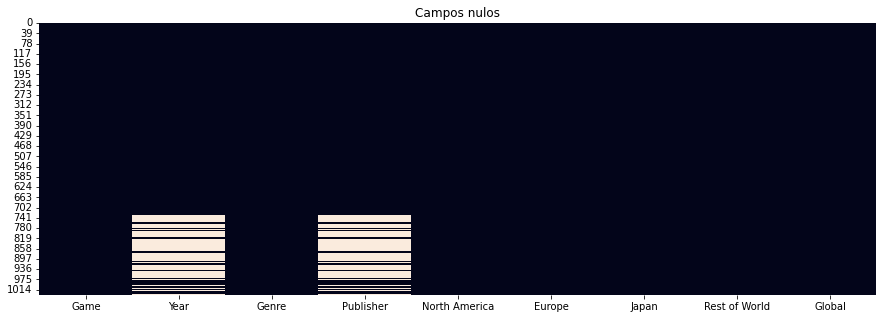

In [14]:
# Nulos graficos

plt.figure(figsize=(15,5))
plt.title('Campos nulos')
sns.heatmap(df.isnull(), cbar=False);

In [16]:
# Retirando valores nulos
df.dropna(inplace=True)

In [17]:
# Estatísticas
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


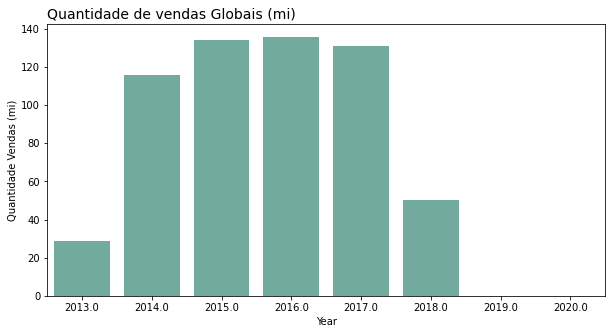

In [26]:
plt.figure( figsize=(10,5))
plt.title('Quantidade de vendas Globais (mi)', loc='left', fontsize=14)
sns.barplot(data=df, x='Year', y='Global', ci=None, color='#69b3a2', estimator=sum)
plt.ylabel('Quantidade Vendas (mi)');

In [29]:
df[['Global', 'Year']].groupby('Year').sum()

,Global
Year,
2013.0,28.76
2014.0,115.85
2015.0,133.99
2016.0,135.72
2017.0,130.90
2018.0,50.20
2019.0,0.00
2020.0,0.00


In [34]:
# Retirando os anos

df = df.loc[(df['Year'] != 2019) & (df['Year'] != 2020)]
df[['Global', 'Year']].groupby('Year').sum()

,Global
Year,
2013.0,28.76
2014.0,115.85
2015.0,133.99
2016.0,135.72
2017.0,130.90
2018.0,50.20


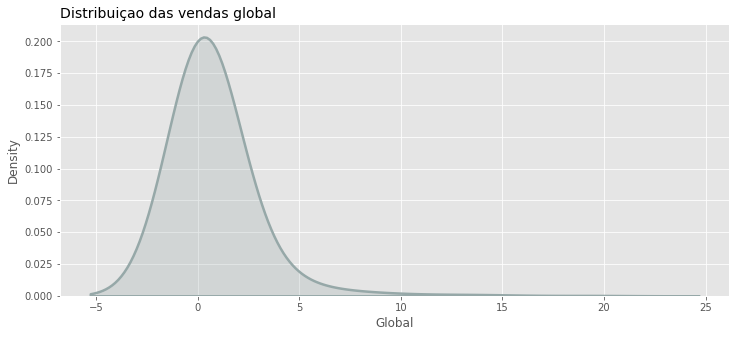

In [38]:
# Tamanho
plt.figure(figsize=(12,5))

# Estilo
plt.style.use('ggplot')

# Titulo
plt.title('Distribuiçao das vendas global', loc='left', fontsize=14)

# Plot
sns.kdeplot(df['Global'], shade=True, bw=1, color='#96a8a8', linewidth=2.5);

In [39]:
df.groupby('Year').sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


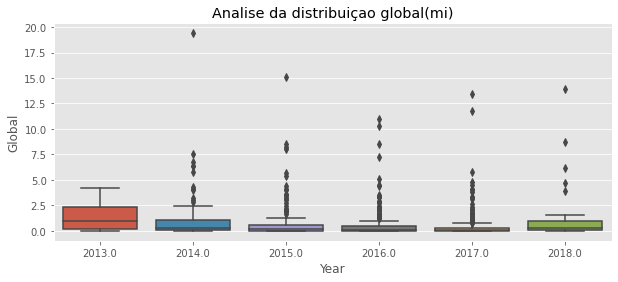

In [44]:
# Tamanho
plt.figure(figsize=(10,4))

# Titulo
plt.title('Analise da distribuiçao global(mi)')

# Plot
sns.boxplot(data=df,x='Year', y='Global');

In [62]:
df[['Game', 'Global', 'Year']]

,Game,Global,Year
0,Grand Theft Auto V,19.39,2014.0
1,Call of Duty: Black Ops 3,15.09,2015.0
2,Red Dead Redemption 2,13.94,2018.0
3,Call of Duty: WWII,13.40,2017.0
4,FIFA 18,11.80,2017.0
...,...,...,...
1024,Biomutant,0.00,2018.0
1026,de Blob,0.00,2017.0
1027,Chaos on Deponia,0.00,2017.0
1028,Code Vein,0.00,2018.0


In [66]:
Analise = df.groupby( by=['Year'] ).sum().reset_index()

# analisando a proporção dos 100% de cada continemente comparado ao Total
America = [ America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

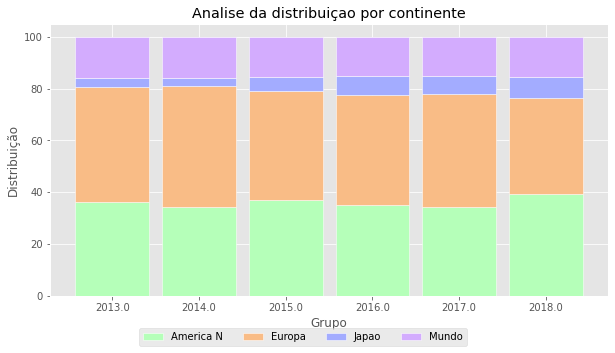

In [80]:
# Tamanho
plt.figure(figsize=(10,5))

# Largura da barra
largura_barra = 0.85
rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

# Titulo
plt.title('Analise da distribuiçao por continente');

# Plot da America
plt.bar (Grupos, America, width=largura_barra, color='#b5ffb9', edgecolor='white')

# Plot da Europa
plt.bar (Grupos, Europa, bottom=America, width=largura_barra, color='#f9bc86', edgecolor='white')

# Plot da Japao
plt.bar (Grupos, Japao, bottom=[A+B for A,B in zip(America, Europa)], width=largura_barra, color='#a3acff', edgecolor='white')

# Plot do Resto do Mundo
plt.bar (Grupos, Mundo, bottom=[A+B+C for A,B,C in zip(America, Europa, Japao)], width=largura_barra, color='#d3acfe', edgecolor='white')

# Labels
plt.xticks( Grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição')

# Legenda
plt.legend(['America N', 'Europa', 'Japao', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4);

In [81]:
df['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [87]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

df['Produtor'] = Funcao_Label.fit_transform(df['Publisher'])
df['Genero'] = Funcao_Label.fit_transform(df['Genre'])
df['Jogo'] = Funcao_Label.fit_transform(df['Game'])

df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [89]:
Paleta_Cores = sns.color_palette('inferno', 8)
Paleta_Cores

[(0.104551, 0.047008, 0.25343),
 (0.290763, 0.045644, 0.418637),
 (0.472328, 0.110547, 0.428334),
 (0.64626, 0.173914, 0.378359),
 (0.812239, 0.266786, 0.274661),
 (0.929644, 0.411479, 0.145367),
 (0.985315, 0.608422, 0.024202),
 (0.969783, 0.820825, 0.238686)]

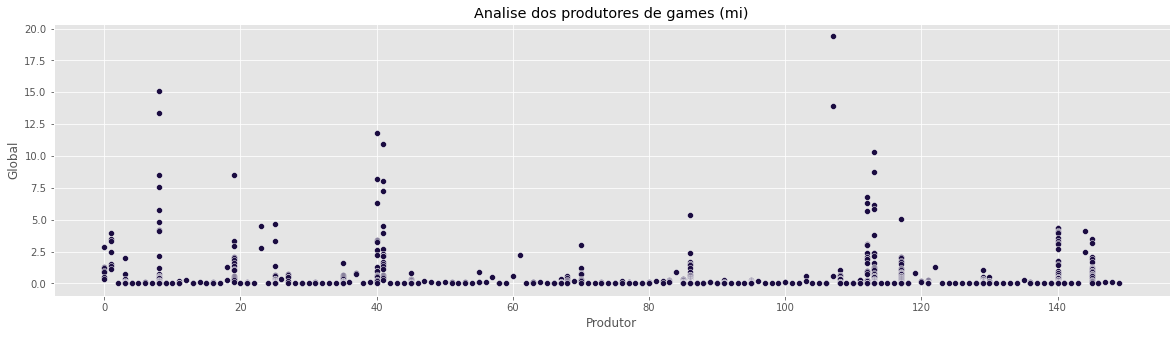

In [92]:
plt.figure(figsize=(20,5))
plt.title('Analise dos produtores de games (mi)')
sns.scatterplot(data=df, x='Produtor', y='Global', color=Paleta_Cores[0] );

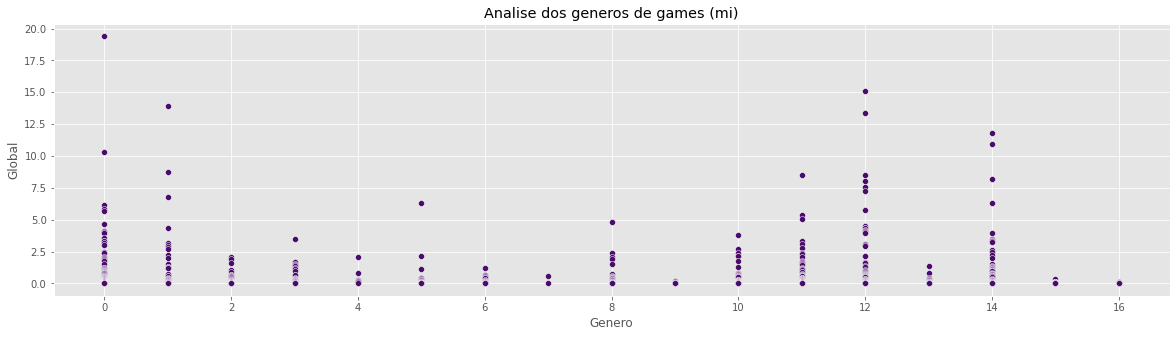

In [99]:
plt.figure(figsize=(20,5))
plt.title('Analise dos generos de games (mi)')
sns.scatterplot(data=df, x='Genero', y='Global', color=Paleta_Cores[1] );

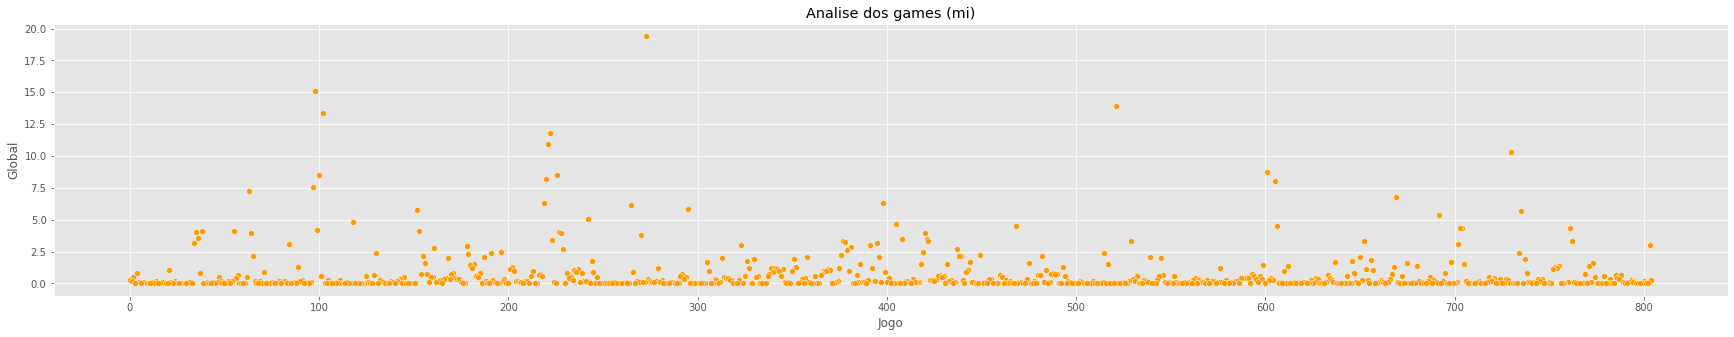

In [98]:
plt.figure(figsize=(30,5))
plt.title('Analise dos games (mi)')
sns.scatterplot(data=df, x='Jogo', y='Global', color=Paleta_Cores[6] );